In [1]:
from metalib.utils import load_multiple_hist_data

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
assets = ['EURUSD', 'EURGBP', 'AUDCHF', 'EURCHF', 'EURCAD']

In [115]:
ohlc = load_multiple_hist_data(assets, 2020)
ohlc = pd.concat([df.close.rename(k) for k,df in ohlc.items()], axis=1)

C:\Users\Hermes\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Hermes\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Hermes\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(

In [116]:
ohlc.index = pd.DatetimeIndex(ohlc.index)

In [117]:
x_del.index

DatetimeIndex(['2020-01-03 20:00:00', '2020-01-04 00:00:00',
               '2020-01-04 04:00:00', '2020-01-04 08:00:00',
               '2020-01-04 12:00:00', '2020-01-04 16:00:00',
               '2020-01-04 20:00:00', '2020-01-05 00:00:00',
               '2020-01-05 04:00:00', '2020-01-05 08:00:00',
               ...
               '2020-12-26 00:00:00', '2020-12-26 04:00:00',
               '2020-12-26 08:00:00', '2020-12-26 12:00:00',
               '2020-12-26 16:00:00', '2020-12-26 20:00:00',
               '2020-12-27 00:00:00', '2020-12-27 04:00:00',
               '2020-12-27 08:00:00', '2020-12-27 12:00:00'],
              dtype='datetime64[ns]', name='time', length=584, freq=None)

In [128]:
vols = ohlc.apply(np.log).diff().resample("4H").apply(lambda x: np.sum(np.square(x)))
vols = vols.apply(np.log).dropna()

x_inf = vols.apply(lambda e: np.isin(e, [np.inf, -np.inf]))
x_del = x_inf[x_inf.apply(np.all, axis=1)]

vols = vols.loc[list(vols.index.difference(x_del.index))]
vols_demeaned = vols - vols.rolling(50).mean()

x = vols.iloc[:499]
y = vols.diff().iloc[1:500]

mu = x
x_bar = x 

C:\Users\Hermes\AppData\Local\Temp\ipykernel_4092\572316394.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vols = ohlc.apply(np.log).diff().resample("4H").apply(lambda x: np.sum(np.square(x)))


In [130]:
h = np.linalg.inv(np.dot(x_bar.T, x_bar))
K = np.dot(h, np.dot(x_bar.T, y))
K = pd.DataFrame(K, columns=assets, index=assets)

K.style.background_gradient(axis=None)

,EURUSD,EURGBP,AUDCHF,EURCHF,EURCAD
EURUSD,-0.425506,0.283570,-0.263879,0.139810,0.305706
EURGBP,0.170334,-0.584080,0.155819,-0.028991,0.201973
AUDCHF,0.498488,0.488497,-0.376992,0.229954,0.342395
EURCHF,0.033327,0.100379,0.098008,-0.117554,-0.033372
EURCAD,-0.226471,-0.280810,0.361610,-0.204478,-0.798087


In [137]:
y = y.shift(-1)

# Multivariate Ornstein-Uhlenbeck Process

The multivariate Ornstein-Uhlenbeck (OU) process is a stochastic process often used in modeling mean-reverting dynamics in multiple dimensions. It is described by the following stochastic differential equation (SDE):

$$
d\mathbf{X}_t = \mathbf{\Theta} (\mathbf{\mu} - \mathbf{X}_t) dt + \mathbf{\Sigma} d\mathbf{W}_t
$$


where:
- $\mathbf{X}_t$ is the $n$-dimensional state vector of the process at time \(t\),
- $\mathbf{\Theta}$ is an $n \times n$ matrix that determines the rate of mean reversion,
- $\mathbf{\mu}$ is an $n$-dimensional vector representing the long-term mean of the process,
- $\mathbf{\Sigma}$ is an $n \times n$ diffusion matrix, which governs the intensity and correlations of the noise,
- $\mathbf{W}_t$ is an $n$-dimensional Wiener process (standard Brownian motion).

### Key Properties
1. **Mean**:
   $$
   \mathbb{E}[\mathbf{X}_t] = \mathbf{\mu} + e^{-\mathbf{\Theta} t} (\mathbf{X}_0 - \mathbf{\mu}),
   $$
   where \(\mathbf{X}_0\) is the initial state at \(t=0\).

2. **Covariance**:
   The covariance of \(\mathbf{X}_t\) converges to a stationary value as \(t \to \infty\):
   $$
   \text{Cov}(\mathbf{X}_t) \to \mathbf{P},
   $$
   where \(\mathbf{P}\) satisfies the Lyapunov equation:
   $$
   \mathbf{\Theta} \mathbf{P} + \mathbf{P} \mathbf{\Theta}^\top = \mathbf{\Sigma} \mathbf{\Sigma}^\top.
   $$

3. **Stationarity**:
   If $\mathbf{\Theta}$ is positive definite, the process is mean-reverting and stationary in the long term.



<Axes: >

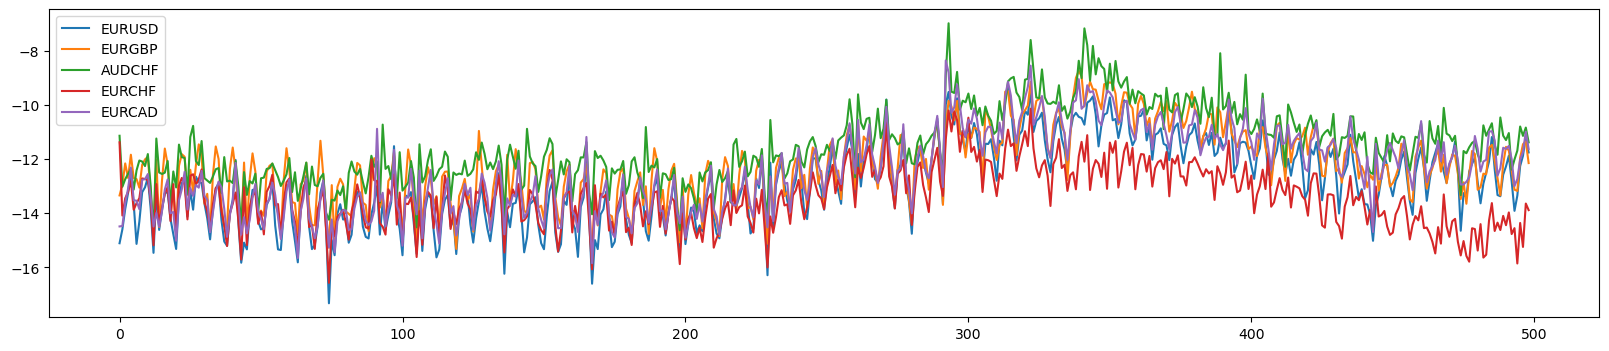

In [131]:
x.reset_index(drop=True).tail(800).plot(figsize=(20, 4))

In [132]:
def generate_comparison_matrix(df):
    """
    Creates a DataFrame where each cell (i, j) is True if column i is greater than column j,
    and False otherwise.
    
    Parameters:
        df (pd.DataFrame): The input dataset.
    
    Returns:
        pd.DataFrame: A DataFrame where entry (i, j) is True if column i is superior to column j.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")
    
    comparison_matrix = pd.DataFrame(
        np.zeros((len(df.columns), len(df.columns)), dtype=bool),
        index=df.columns,
        columns=df.columns
    )
    
    for col_i in df.columns:
        for col_j in df.columns:
            if col_i != col_j:
                comparison_matrix.loc[col_i, col_j] = (df[col_i] > df[col_j]).all()
    
    return comparison_matrix

In [133]:
def compute_rolling_averages(df, window_sizes):
    """
    Computes rolling averages of each column over multiple window sizes.
    
    Parameters:
        df (pd.DataFrame): The input dataset.
        window_sizes (list of int): The list of rolling window sizes.

    Returns:
        pd.DataFrame: A DataFrame containing rolling averages for each column and each window size.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")
    if not all(isinstance(w, int) and w > 0 for w in window_sizes):
        raise ValueError("All window sizes must be positive integers.")
    
    rolling_averages = pd.DataFrame(index=df.index)

    for col in df.columns:
        for window in window_sizes:
            rolling_averages[f"{col}_rolling_{window}"] = df[col].rolling(window=window).mean()
    
    return rolling_averages

In [134]:
comparison_x = generate_comparison_matrix(x)
sma_x = compute_rolling_averages(x, [5, 10, 50])

In [138]:
features_x = pd.concat([x, comparison_x, sma_x], axis=1).dropna()
y = y.loc[features_x.index]

In [139]:
from catboost import CatBoost